# 2021 Day 9

https://adventofcode.com/2021/day/9

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
HEIGHTS = np.vstack(pd.read_csv('input-09.txt', header=None)[0].map(list)).astype(int)
HEIGHTS

array([[7, 8, 5, ..., 3, 4, 5],
       [6, 7, 4, ..., 2, 3, 3],
       [5, 4, 3, ..., 1, 0, 2],
       ...,
       [4, 5, 7, ..., 5, 6, 7],
       [5, 6, 8, ..., 3, 9, 8],
       [6, 7, 8, ..., 5, 6, 9]])

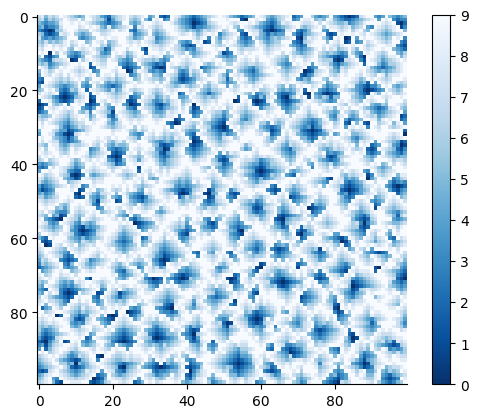

In [3]:
plt.imshow(HEIGHTS, cmap='Blues_r')
plt.colorbar()

## Part 1

In [4]:
lowest_points = (HEIGHTS == ndimage.minimum_filter(HEIGHTS, size=3))
risk = 1 + HEIGHTS[lowest_points]
risk.sum()

535

## Part 2

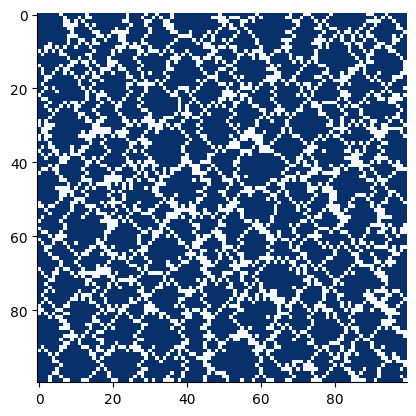

In [5]:
plt.imshow(HEIGHTS < 9, cmap='Blues')

In [6]:
labels, n_objects = ndimage.label(HEIGHTS < 9)

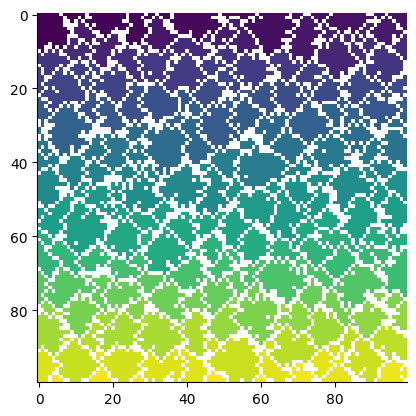

In [7]:
plt.imshow(np.where(labels, labels, np.nan))

In [8]:
label_counts = pd.DataFrame([
    dict(label=label, N=np.sum(labels==label))
    for label in np.unique(labels)
    if label != 0
])
label_counts

,label,N
0,1,72
1,2,11
2,3,51
3,4,35
4,5,4
...,...,...
219,220,14
220,221,10
221,222,5
222,223,4


In [9]:
label_counts.sort_values('N', ascending=False).head(3)

,label,N
205,206,109
127,128,103
71,72,100


In [10]:
label_counts.sort_values('N', ascending=False).head(3).N.prod()

1122700